In [1]:
import numpy as np
from math import sin, cos, pi, factorial, exp, tan
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from numba import jit

In [50]:
#@jit
def LagrangeInterpolation(point, X, Y):
    xp = point
    yp = 0
    n = X.shape[0]
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (xp - X[j])/(X[i] - X[j])
        yp = yp + p * Y[i]
        
    return yp

In [35]:
function = '(2+x**2+10*cos(x))/(10+x)'
n = 20
a = 0
b = 10
def Function(x):
    function = '(2+x**2+10*cos(x))/(10+x)'
    return eval(function)

Для равномерного распределения интерполяционных узлов

In [58]:
F = np.zeros(n, dtype=np.float64)
X = np.linspace(a, b, num = n)
for idx, x in np.ndenumerate(X):
    F[idx] = eval(function)

In [59]:
newX = np.linspace(a - (b-a)/n, b + (b-a)/n, num = n, dtype=np.float64)
iF = np.zeros(n, dtype=np.float64)
newF = np.zeros(n, dtype=np.float64)
serror = 0
for idx, x in np.ndenumerate(newX):
    iF[idx] = LagrangeInterpolation(newX[idx], X, F)
    newF[idx] = eval(function)
    serror = abs((iF[idx] - newF[idx])/iF[idx])
avgerr = serror / (n * 10)
print('ошибочка вышла:', avgerr)

ошибочка вышла: 6.68509588232438e-10


Для Чебышевского распределения интерполяционных узлов

In [39]:
F = np.zeros(n, dtype=np.float64)
X = np.zeros(n, dtype=np.float64)
for k in range(0, 2 * n, 2):
    X[int(k/2)] = (a + b) / 2 + (b - a) / 2 * cos((2 * k - 1)/(2 * n) * pi)
X.sort()
for idx, x in np.ndenumerate(X):
    F[idx] = eval(function)

In [40]:
newX = np.linspace(a - (b-a)/n, b + (b-a)/n, num = n, dtype=np.float64)
iF = np.zeros(n, dtype=np.float64)
newF = np.zeros(n, dtype=np.float64)
serror = 0
Rn = np.zeros(n, dtype=np.float64)
for idx, x in np.ndenumerate(newX):
    iF[idx] = LagrangeInterpolation(newX[idx], X, F)
    newF[idx] = eval(function)
    serror = abs((iF[idx] - newF[idx])/iF[idx])
avgerr = serror / (n * 10)
print('ошибочка вышла:', avgerr)

ошибочка вышла: 7.499845496842708e-11


In [287]:
Rn = np.abs(iF - newF)
Rn

array([3.66061873e-04, 2.99278119e-07, 3.19286400e-07, 2.76350537e-07,
       2.77895927e-07, 2.60267921e-07, 1.59618843e-07, 6.66133815e-16,
       1.31022607e-07, 1.74697671e-07, 1.51298140e-07, 1.20403842e-07,
       1.09011215e-07, 7.74971598e-08, 6.81631225e-05])

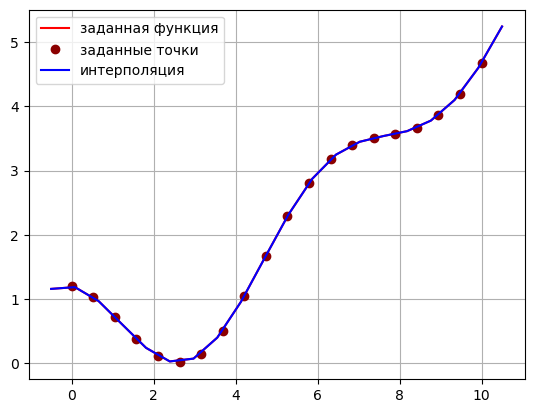

<Figure size 50000x50000 with 0 Axes>

In [60]:
#plt.style.use('seaborn-deep')
plt.style.use('default')
plt.plot(newX, newF, color='red', label='заданная функция')
plt.plot(X, F, color='#8b0000', marker='o', linewidth=0, label='заданные точки')
plt.plot(newX, iF, 'blue', label='интерполяция')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

In [61]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(
                    x=newX,
                    y=newF,
                    mode='lines',
                    name='заданная функция',
                    line=dict(color='red')))
fig.add_trace(go.Scatter(
                    x=X,
                    y=F,
                    mode='markers',
                    name='заданные точки'))
fig.add_trace(go.Scatter(
                    x=newX,
                    y=iF,
                    mode='lines',
                    name='интерполяция',
                    line=dict(color='blue')))

# Edit the layout
fig.update_layout(title='Интерполяция функции по точкам',
                   xaxis_title='x',
                   yaxis_title='y')

fig.update_layout(
    width=900,
    height=600
    )

fig.show()

In [93]:
def Df(x, n, h = 0.1):
    if n == 0: return Function(x)
    if n == 1: return (Function(x + h) - Function(x - h)) / (2 * h)
    fc = (Df(x + h, n-1) - Df(x - h, n-1)) / (2 * h)
    return fc

In [62]:
def NumericalDifferentiation(function, X, x, k):
    Vfunction = np.vectorize(function)
    n = X.shape[0]
    rhs = np.array([0 if i < k else factorial(i)/factorial(i - k) * float(x)**(i - k) for i in range(n)])
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i][j] = np.power(X[j], i)
    C = np.linalg.inv(matrix).dot(rhs)
    Y = Vfunction(X)
    return C.dot(Y)

In [63]:
NumericalDifferentiation(lambda x: x**2, np.linspace(-8, 8, 17), -7, 1)

-13.999990443685874

In [64]:
NumericalDifferentiation(lambda x: LagrangeInterpolation(x, np.linspace(-8, 8, 17), np.power(np.linspace(-8, 8, 17), 2)), np.linspace(-8, 8, 17), -7, 1)

-13.999990443685874

In [65]:
NumericalDifferentiation(lambda x: exp(tan(x/5)), np.linspace(0, 10, 11), 2, 5)

-4850.569383058111

In [66]:
np.vectorize(Function)([1,2])

array([0.76391119, 0.15321097])

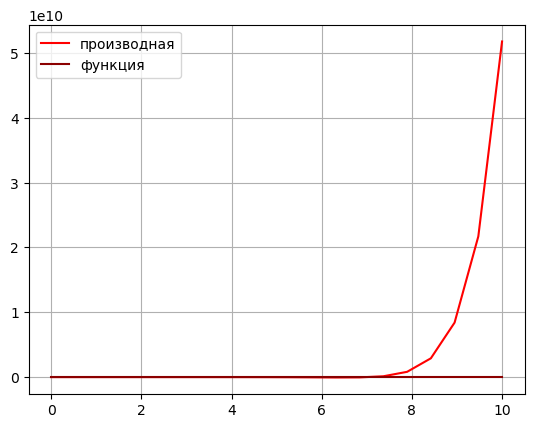

<Figure size 50000x50000 with 0 Axes>

In [67]:
dX = np.array([NumericalDifferentiation(lambda x: LagrangeInterpolation(x, X, np.vectorize(Function)(X)), X, xi, 1) for xi in X])
plt.plot(X, dX, color='red', label='производная')
plt.plot(X, F, color='#8b0000', label='функция')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()